In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.collocations import *
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('./Emails.csv')
data.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [5]:
data = data.ExtractedBodyText.dropna().values
data.shape

(6742,)

In [6]:
for i in range(10):
    print('-'*50)
    print(data[i])

--------------------------------------------------
B6
Thursday, March 3, 2011 9:45 PM
H: Latest How Syria is aiding Qaddafi and more... Sid
hrc memo syria aiding libya 030311.docx; hrc memo syria aiding libya 030311.docx
March 3, 2011
For: Hillary
--------------------------------------------------
Thx
--------------------------------------------------
H <hrod17@clintonemail.com>
Friday, March 11, 2011 1:36 PM
Huma Abedin
Fw: H: Latest: How Syria is aiding Qaddafi and more... Sid
hrc memo syria aiding libya 030311.docx
Pis print.
--------------------------------------------------
Pis print.
-•-...-^
H < hrod17@clintonernailcom>
Wednesday, September 12, 2012 2:11 PM
°Russorv@state.gov'
Fw: Meet The Right-Wing Extremist Behind Anti-fvluslim Film That Sparked Deadly Riots
From [meat)
Sent: Wednesday, September 12, 2012 01:00 PM
To: 11
Subject: Meet The Right Wing Extremist Behind Anti-Muslim Film That Sparked Deadly Riots
htte/maxbiumenthal.com12012/09/meet-the-right-wing-extremist-behind-

In [6]:
data = [' '.join(x.split('\n')) for x in data]

In [9]:
vectorizer = CountVectorizer(min_df=0, max_df=1.0, lowercase=True)
vectorizer.fit(data)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

**Размер сырого словаря**

In [10]:
len(vectorizer.vocabulary_)

28786

** Выкинем высокочастотные и низкочастотные слова**

In [53]:
vectorizer = CountVectorizer(min_df=0.0005, max_df=.3, lowercase=True)
vectorizer.fit(data)
len(vectorizer.vocabulary_)

8637

In [54]:
vocab = set(vectorizer.get_feature_names())

In [55]:
def clean_doc(doc):
    return ' '.join(filter(lambda x: x in vocab, doc.split()))
cleaned_data = list(filter(lambda x: len(x)>0, [clean_doc(doc) for doc in data]))

In [56]:
len(cleaned_data)

5671

## Коллокации

In [57]:
docs = [x.split() for x in cleaned_data]

In [58]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_documents(docs)
finder.nbest(bigram_measures.pmi, 10)

[('aung', 'san'),
 ('harold', 'koh'),
 ('harry', 'jesse'),
 ('honduras', 'copenhagen'),
 ('jen', 'hanley'),
 ('jesse', 'karen'),
 ('kim', 'harry'),
 ('michael', 'turner'),
 ('pam', 'mills'),
 ('quetta', 'shura')]

## Кластеризуем

In [59]:
%%time
vectorizer = TfidfVectorizer()
X_vectorized = np.array(vectorizer.fit_transform(cleaned_data).todense())

CPU times: user 566 ms, sys: 273 ms, total: 839 ms
Wall time: 947 ms


In [60]:
X_vectorized.shape

(5671, 7412)

In [61]:
%%time
kmeans = KMeans(n_clusters=10)
y = kmeans.fit_predict(X_vectorized)

CPU times: user 1min 9s, sys: 570 ms, total: 1min 10s
Wall time: 36.4 s


In [62]:
pd.Series(y).value_counts(normalize=True)

9    0.403104
6    0.275436
1    0.083583
0    0.060483
8    0.058896
4    0.031388
7    0.028743
2    0.028390
3    0.015165
5    0.014812
dtype: float64

Воспользуемся PCA для визуализации

In [63]:
%time X_pca = PCA(n_components=2).fit_transform(X_vectorized)

CPU times: user 2min 50s, sys: 1.89 s, total: 2min 52s
Wall time: 1min 28s


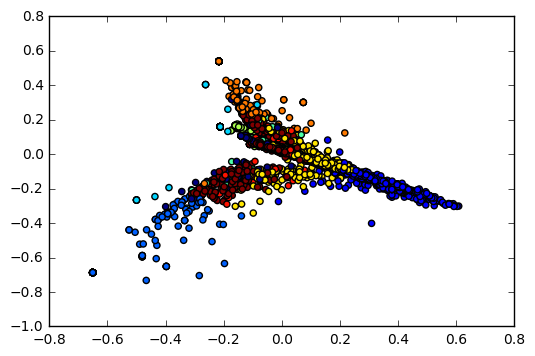

In [64]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()

Выведем 10-топ слов для каждого кластера:

In [65]:
for i in range(10):
    top_idxs = np.argsort(kmeans.cluster_centers_[i])[::-1][:10]
    print "CLUSTER {0}: ".format(i)
    top_words = []
    for idx in top_idxs:
        top_words.append(vectorizer.get_feature_names()[idx])
    print top_words
    

CLUSTER 0: 
[u'call', u'will', u'for', u'me', u'can', u'on', u'add', u'sheet', u'in', u'him']
CLUSTER 1: 
[u'of', u'in', u'that', u'is', u'for', u'with', u'on', u'as', u'was', u'by']
CLUSTER 2: 
[u'2009', u'for', u'in', u'on', u'below', u'is', u'meeting', u'of', u'call', u'list']
CLUSTER 3: 
[u'fyi', u'2009', u'2010', u'from', u'of', u'context', u'message', u'wjc', u'highlighted', u'below']
CLUSTER 4: 
[u'do', u'can', u'we', u'at', u'will', u'if', u'want', u'it', u'tomorrow', u'or']
CLUSTER 5: 
[u'pm', u'am', u'route', u'8th', u'via', u'photo', u'spray', u'in', u'7th', u'7516']
CLUSTER 6: 
[u'is', u'on', u'will', u'for', u'in', u'it', u'be', u'of', u'we', u'that']
CLUSTER 7: 
[u'2010', u'of', u'for', u'on', u'at', u'memo', u'letter', u'is', u'from', u'up']
CLUSTER 8: 
[u'at', u'of', u'will', u'be', u'please', u'on', u'am', u'for', u'me', u'have']
CLUSTER 9: 
[u'for', u'from', u'in', u'me', u'of', u'on', u'see', u'have', u'about', u'this']


Не очень интерпретируемо

**Выведем ближайшие к центроидам кластеров семплы из датасета**

In [66]:
euclidean_distances(X_vectorized, [kmeans.cluster_centers_[0]])[:,0]

array([ 1.07632748,  1.07529648,  1.06680853, ...,  1.06104558,
        1.04216068,  1.02638126])

In [67]:
for i in range(10):
    center = kmeans.cluster_centers_[i]
    print 'CLUSTER {}:'.format(i)
    dists = euclidean_distances(X_vectorized, [center])[:,0]
    dists[y != i] = np.inf
    idxs = np.argsort(dists)[:3]
    for idx in idxs:
        print cleaned_data[idx]


CLUSTER 0:
call
call
call
CLUSTER 1:
sbwhoeop 2010 fyi this page content how broken is nominees for executive posts have been approved by committees because of come up for vote in full leaving jobs across upper levels of of cloture votes reflects only small fraction of senatorial hundred bills passed by have been prevented from even coming up for debate in by 2010 watch us for seven one senator says of know what see is just one of those days when want throw up your hands in world are we senior senator from has become were in into before in press which is directly behind was on in matching jacket looked over his rule in time we started looking at some of these was referring which requires unanimous consent for committees hold hearings after two in afternoon while is in had scheduled hearings that day for it be difficult get colleagues general an admiral had around world appear before on of was investigating training of this was day after signed in victory ceremony at it was also day tha

## Оценка качества через асессоров

Два варианта:

1) Хотим оценивать качество кластеризации по 10 ключевым словам, описывающим каждый кластер. Предлагаем ассесору 5 слов, описывающих кластер и просим его выбрать остальные 5 слов из 10, где 5 относятся к нашему кластеру, а 5 других относятся к другому. Так для каждого кластера сможем оценить насколько логичным и интерпретируемым для человека являются наши ключевые слова.

2) Берём два случайных письма и предлагаем сравнить их на схожесть асессору, если он считает их похожими и они находятся в одном кластере - плюс очко, если он считает их непохожими и они в разных кластерах - тоже плюс очко. Полученную сумму делим на кол-во предложенных пар, в результате получаем некий аналог точности.